In [292]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

# GOAL: Search for Wake Forest pitchers that have SSW pitches and don't know it yet
# GOAL: Identify pitchers that have the potential to take advantage of SSW but don't already

In [293]:
# Read in WFU bullpen csv files from TrackMan and Rapsodo
# TrackMan will have inferred axis based on pitch movement (radar based)
# Rapsodo will have observed axis based on picture of ball flight (optical based)

tmdf = pd.read_csv(r'C:\Users\joeym\Documents\Wake Forest\Pitching Lab\Baseball Analytics\bullpenTMssw.csv')
sododf = pd.read_csv(r'C:\Users\joeym\Documents\Wake Forest\Pitching Lab\Baseball Analytics\wfurapsodo.csv')

In [294]:
print(tmdf.columns)

Index(['PitchNo', 'Year', 'Date', 'Time', 'Pitcher', 'PitcherId',
       'PitcherThrows', 'PitcherTeam', 'PitcherSet', 'TaggedPitchType',
       'PitchSession', 'Flag', 'RelSpeed', 'VertRelAngle', 'HorzRelAngle',
       'SpinRate', 'SpinAxis', 'Tilt', 'RelHeight', 'RelSide', 'Extension',
       'VertBreak', 'InducedVertBreak', 'HorzBreak', 'PlateLocHeight',
       'PlateLocSide', 'ZoneSpeed', 'VertApprAngle', 'HorzApprAngle',
       'ZoneTime', 'pfxx', 'pfxz', 'x0', 'y0', 'z0', 'vx0', 'vy0', 'vz0',
       'ax0', 'ay0', 'az0', 'PitchUID', 'CalibrationId', 'EffVelocity',
       'PracticeType', 'Device', 'SpinEff'],
      dtype='object')


In [295]:
print(sododf.columns)

Index(['PitchNo', 'Year', 'Date', 'Time', 'Pitcher', 'PitcherThrows',
       'TaggedPitchType', 'RelSpeed', 'SpinRate', 'TrueSpin', 'SpinEff',
       'Tilt', 'HorzBreak', 'InducedVertBreak', 'RelHeight', 'RelSide',
       'VertRelAngle', 'HorzRelAngle', 'Gyro'],
      dtype='object')


In [296]:
# Merge data frames on pitcher, date, and time
sswdf = tmdf.merge(sododf,  how='inner', left_on=['Pitcher', 'Date', 'PitchNo'], right_on=['Pitcher', 'Date', 'PitchNo'])
sswdf = sswdf.drop(['Pitcher'], axis=1)

sswdf

,PitchNo,Year_x,Date,Time_x,PitcherId,PitcherThrows_x,PitcherTeam,PitcherSet,TaggedPitchType_x,PitchSession,...,TrueSpin,SpinEff_y,Tilt_y,HorzBreak_y,InducedVertBreak_y,RelHeight_y,RelSide_y,VertRelAngle_y,HorzRelAngle_y,Gyro
0,2,Fall_2020,10/14/2020,14:41:25,8899457,Right,WAK_FAL,Windup,sideSlider,Live,...,561,21.3,10:04,-4.8,0.7,3.9,3.6,1.3,-4.8,77.7
1,3,Fall_2020,10/14/2020,14:41:37,8899457,Right,WAK_FAL,Windup,sideSlider,Live,...,1057,37.7,9:28,-8.8,0.5,3.8,3.3,0.2,-4.6,67.9
2,5,Fall_2020,10/14/2020,14:42:47,8899457,Right,WAK_FAL,Windup,sideSlider,Live,...,605,22.8,9:40,-5.3,-0.4,3.9,3.3,0.9,-5.8,76.8
3,6,Fall_2020,10/14/2020,14:42:59,8899457,Right,WAK_FAL,Windup,sideFastball,Live,...,1870,87,2:26,17,4.1,4,3.3,0.7,-6.4,29.6
4,7,Fall_2020,10/14/2020,14:43:15,8899457,Right,WAK_FAL,Windup,sideChangeUp,Live,...,1376,69.6,3:00,13.7,-1,4.2,3.7,2.1,-3.4,45.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,1,Winter_2021,2/3/2021,16:07:12,1000017376,Right,WAK_DEA,Stretch,Sinker,Live,...,2011,92.7,01h:18m,12.1,15,6.2,2.7,-1.5,-4.9,22.1
639,2,Winter_2021,2/3/2021,16:07:29,1000017376,Right,WAK_DEA,Stretch,Sinker,Live,...,1840,90.1,01h:00m,9,15.7,6.1,2.9,-0.4,-2.9,25.7
640,3,Winter_2021,2/3/2021,16:08:03,1000017376,Right,WAK_DEA,Windup,Sinker,Live,...,1835,91.1,01h:16m,11.3,14.7,6,2.8,-2.7,-3.3,24.3
641,4,Winter_2021,2/3/2021,16:08:58,1000017376,Right,WAK_DEA,Stretch,Sinker,Live,...,1918,93.5,01h:16m,11.7,15.1,6,2.9,-0.8,-3.4,20.8


In [297]:
# Fill blank cells
sswdf = sswdf.replace(r'^\s*$', np.NaN, regex=True)

In [298]:
# Split Tilt_y columns into 2 columns (hour, minutes)
sswdf[['Hour', 'Minutes']] = sswdf['Tilt_y'].str.split(':', 1, expand=True)

# Get rid of h and m in Tilt_y (eg. 01h:18m)
sswdf['Hour'] = sswdf['Hour'].str.rstrip('h')
sswdf['Minutes'] = sswdf['Minutes'].str.rstrip('m')
sswdf['Minutes'] = sswdf['Minutes'].str.rstrip(' PM')
sswdf

,PitchNo,Year_x,Date,Time_x,PitcherId,PitcherThrows_x,PitcherTeam,PitcherSet,TaggedPitchType_x,PitchSession,...,Tilt_y,HorzBreak_y,InducedVertBreak_y,RelHeight_y,RelSide_y,VertRelAngle_y,HorzRelAngle_y,Gyro,Hour,Minutes
0,2,Fall_2020,10/14/2020,14:41:25,8899457,Right,WAK_FAL,Windup,sideSlider,Live,...,10:04,-4.8,0.7,3.9,3.6,1.3,-4.8,77.7,10,04
1,3,Fall_2020,10/14/2020,14:41:37,8899457,Right,WAK_FAL,Windup,sideSlider,Live,...,9:28,-8.8,0.5,3.8,3.3,0.2,-4.6,67.9,9,28
2,5,Fall_2020,10/14/2020,14:42:47,8899457,Right,WAK_FAL,Windup,sideSlider,Live,...,9:40,-5.3,-0.4,3.9,3.3,0.9,-5.8,76.8,9,40
3,6,Fall_2020,10/14/2020,14:42:59,8899457,Right,WAK_FAL,Windup,sideFastball,Live,...,2:26,17,4.1,4,3.3,0.7,-6.4,29.6,2,26
4,7,Fall_2020,10/14/2020,14:43:15,8899457,Right,WAK_FAL,Windup,sideChangeUp,Live,...,3:00,13.7,-1,4.2,3.7,2.1,-3.4,45.9,3,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,1,Winter_2021,2/3/2021,16:07:12,1000017376,Right,WAK_DEA,Stretch,Sinker,Live,...,01h:18m,12.1,15,6.2,2.7,-1.5,-4.9,22.1,01,18
639,2,Winter_2021,2/3/2021,16:07:29,1000017376,Right,WAK_DEA,Stretch,Sinker,Live,...,01h:00m,9,15.7,6.1,2.9,-0.4,-2.9,25.7,01,00
640,3,Winter_2021,2/3/2021,16:08:03,1000017376,Right,WAK_DEA,Windup,Sinker,Live,...,01h:16m,11.3,14.7,6,2.8,-2.7,-3.3,24.3,01,16
641,4,Winter_2021,2/3/2021,16:08:58,1000017376,Right,WAK_DEA,Stretch,Sinker,Live,...,01h:16m,11.7,15.1,6,2.9,-0.8,-3.4,20.8,01,16


In [299]:
# Remove any missed readings from Rapsodo
sswdf = sswdf.dropna(axis=0, how='any', subset=['Minutes'])

In [300]:
# Convert Hour and Minutes columns to integer types
sswdf['Hour'] = sswdf['Hour'].astype(int)
sswdf['Minutes'] = sswdf['Minutes'].astype(int)
sswdf

<ipython-input-300-43779facff66>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sswdf['Hour'] = sswdf['Hour'].astype(int)
<ipython-input-300-43779facff66>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sswdf['Minutes'] = sswdf['Minutes'].astype(int)


,PitchNo,Year_x,Date,Time_x,PitcherId,PitcherThrows_x,PitcherTeam,PitcherSet,TaggedPitchType_x,PitchSession,...,Tilt_y,HorzBreak_y,InducedVertBreak_y,RelHeight_y,RelSide_y,VertRelAngle_y,HorzRelAngle_y,Gyro,Hour,Minutes
0,2,Fall_2020,10/14/2020,14:41:25,8899457,Right,WAK_FAL,Windup,sideSlider,Live,...,10:04,-4.8,0.7,3.9,3.6,1.3,-4.8,77.7,10,4
1,3,Fall_2020,10/14/2020,14:41:37,8899457,Right,WAK_FAL,Windup,sideSlider,Live,...,9:28,-8.8,0.5,3.8,3.3,0.2,-4.6,67.9,9,28
2,5,Fall_2020,10/14/2020,14:42:47,8899457,Right,WAK_FAL,Windup,sideSlider,Live,...,9:40,-5.3,-0.4,3.9,3.3,0.9,-5.8,76.8,9,40
3,6,Fall_2020,10/14/2020,14:42:59,8899457,Right,WAK_FAL,Windup,sideFastball,Live,...,2:26,17,4.1,4,3.3,0.7,-6.4,29.6,2,26
4,7,Fall_2020,10/14/2020,14:43:15,8899457,Right,WAK_FAL,Windup,sideChangeUp,Live,...,3:00,13.7,-1,4.2,3.7,2.1,-3.4,45.9,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,1,Winter_2021,2/3/2021,16:07:12,1000017376,Right,WAK_DEA,Stretch,Sinker,Live,...,01h:18m,12.1,15,6.2,2.7,-1.5,-4.9,22.1,1,18
639,2,Winter_2021,2/3/2021,16:07:29,1000017376,Right,WAK_DEA,Stretch,Sinker,Live,...,01h:00m,9,15.7,6.1,2.9,-0.4,-2.9,25.7,1,0
640,3,Winter_2021,2/3/2021,16:08:03,1000017376,Right,WAK_DEA,Windup,Sinker,Live,...,01h:16m,11.3,14.7,6,2.8,-2.7,-3.3,24.3,1,16
641,4,Winter_2021,2/3/2021,16:08:58,1000017376,Right,WAK_DEA,Stretch,Sinker,Live,...,01h:16m,11.7,15.1,6,2.9,-0.8,-3.4,20.8,1,16


In [301]:
# Hours 0-5 need to add 180 degrees
# Hours 6-11 need to subtract 180 degrees

In [302]:
# Function to convert clock tilt into degrees
def ObservedAxis(sswdf):
    angle = 30 * sswdf['Hour'] + 0.5 * sswdf['Minutes']
    if sswdf['Hour'] <= 5:
        return angle + 180
    elif sswdf['Hour'] >= 6:
        return angle - 180

sswdf['ObservedAxis'] = sswdf[['Hour', 'Minutes']].apply(ObservedAxis, axis=1)

<ipython-input-302-e8774bbe83d7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sswdf['ObservedAxis'] = sswdf[['Hour', 'Minutes']].apply(ObservedAxis, axis=1)


In [303]:
# Change name of TrackMan "SpinAxis" to "InferredAxis"
sswdf.rename(columns = {'SpinAxis':'InferredAxis'}, inplace = True)

c:\users\joeym\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [304]:
# Function to calculate difference between Observed Axis (Rapsodo) and Inferred Axis (TrackMan)
def AxisDeviation(sswdf):
    return sswdf['ObservedAxis'] - sswdf['InferredAxis']

sswdf['AxisDeviation'] = sswdf[['ObservedAxis', 'InferredAxis']].apply(AxisDeviation, axis=1)

# Function to return absolute value of AxisDeviation
def AbsValAxisDeviation(sswdf):
    return abs(sswdf['AxisDeviation'])

sswdf['AbsValAxisDeviation'] = sswdf[['AxisDeviation']].apply(AbsValAxisDeviation, axis=1)

sswdf['RelSpeed_x'] = sswdf['RelSpeed_x'].astype(float)
sswdf['RelSpeed_y'] = sswdf['RelSpeed_y'].astype(float)
sswdf['Gyro'] = sswdf['Gyro'].astype(float)

# Function to calculate difference between Rapsodo and TrackMan reported velocities
def VeloDeviation(sswdf):
    return sswdf['RelSpeed_x'] - sswdf['RelSpeed_y']

sswdf['VeloDeviation'] = sswdf[['RelSpeed_x', 'RelSpeed_y']].apply(VeloDeviation, axis=1)

# Function to check if the pitch type was reported differently between Rapsodo and TrackMan
# Checking which pitches are not lined up properly
def SamePitchType(sswdf):
    if sswdf['TaggedPitchType_x'] == sswdf['TaggedPitchType_y']:
        return True
    else:
        return False

sswdf['SamePitchType'] = sswdf[['TaggedPitchType_x', 'TaggedPitchType_y']].apply(SamePitchType, axis=1)

#sswdf

<ipython-input-304-b4760b391689>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sswdf['AxisDeviation'] = sswdf[['ObservedAxis', 'InferredAxis']].apply(AxisDeviation, axis=1)
<ipython-input-304-b4760b391689>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sswdf['AbsValAxisDeviation'] = sswdf[['AxisDeviation']].apply(AbsValAxisDeviation, axis=1)
<ipython-input-304-b4760b391689>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [305]:
# Function to calculate time difference between Rapsodo and TrackMan data
def TimeDifference(sswdf):
    t1 = pd.to_datetime(sswdf['Time_x'])
    t2 = pd.to_datetime(sswdf['Time_y'])
    tdiff = t2 - t1
    tdiff = tdiff.total_seconds()
    return tdiff

sswdf['TimeDifference'] = sswdf[['Time_x', 'Time_y']].apply(TimeDifference, axis=1)
sswdf

<ipython-input-305-5b2291919fd1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sswdf['TimeDifference'] = sswdf[['Time_x', 'Time_y']].apply(TimeDifference, axis=1)


,PitchNo,Year_x,Date,Time_x,PitcherId,PitcherThrows_x,PitcherTeam,PitcherSet,TaggedPitchType_x,PitchSession,...,HorzRelAngle_y,Gyro,Hour,Minutes,ObservedAxis,AxisDeviation,AbsValAxisDeviation,VeloDeviation,SamePitchType,TimeDifference
0,2,Fall_2020,10/14/2020,14:41:25,8899457,Right,WAK_FAL,Windup,sideSlider,Live,...,-4.8,77.7,10,4,122.0,13.94545,13.94545,1.28249,True,-2.0
1,3,Fall_2020,10/14/2020,14:41:37,8899457,Right,WAK_FAL,Windup,sideSlider,Live,...,-4.6,67.9,9,28,104.0,-33.40088,33.40088,-0.92501,True,14.0
2,5,Fall_2020,10/14/2020,14:42:47,8899457,Right,WAK_FAL,Windup,sideSlider,Live,...,-5.8,76.8,9,40,110.0,-28.23259,28.23259,0.33908,True,-2.0
3,6,Fall_2020,10/14/2020,14:42:59,8899457,Right,WAK_FAL,Windup,sideFastball,Live,...,-6.4,29.6,2,26,253.0,7.56504,7.56504,1.51632,False,-2.0
4,7,Fall_2020,10/14/2020,14:43:15,8899457,Right,WAK_FAL,Windup,sideChangeUp,Live,...,-3.4,45.9,3,0,270.0,-30.96208,30.96208,1.48060,True,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,1,Winter_2021,2/3/2021,16:07:12,1000017376,Right,WAK_DEA,Stretch,Sinker,Live,...,-4.9,22.1,1,18,219.0,-26.49063,26.49063,0.42342,False,-15.0
639,2,Winter_2021,2/3/2021,16:07:29,1000017376,Right,WAK_DEA,Stretch,Sinker,Live,...,-2.9,25.7,1,0,210.0,-28.81014,28.81014,-0.24295,False,-19.0
640,3,Winter_2021,2/3/2021,16:08:03,1000017376,Right,WAK_DEA,Windup,Sinker,Live,...,-3.3,24.3,1,16,218.0,-29.19818,29.19818,1.87887,False,-35.0
641,4,Winter_2021,2/3/2021,16:08:58,1000017376,Right,WAK_DEA,Stretch,Sinker,Live,...,-3.4,20.8,1,16,218.0,NaN,NaN,-0.76933,False,-56.0


In [306]:
# Remove pitches with "False" in "SamePitchType" column
# Remove pitches with more than a 5 mph difference in "VeloDeviation" column
sswdf.drop(sswdf[sswdf['SamePitchType'] == False].index, inplace=True)
sswdf.drop(sswdf[sswdf['VeloDeviation'] > 5].index, inplace=True)
sswdf = sswdf[(sswdf['TimeDifference'] >= -5) & (sswdf['TimeDifference'] < 5)]
sswdf['TaggedPitchType_x'] = sswdf['TaggedPitchType_x'].str.lstrip('side')
sswdf

c:\users\joeym\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
c:\users\joeym\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-306-0aea68bfc674>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

,PitchNo,Year_x,Date,Time_x,PitcherId,PitcherThrows_x,PitcherTeam,PitcherSet,TaggedPitchType_x,PitchSession,...,HorzRelAngle_y,Gyro,Hour,Minutes,ObservedAxis,AxisDeviation,AbsValAxisDeviation,VeloDeviation,SamePitchType,TimeDifference
0,2,Fall_2020,10/14/2020,14:41:25,8899457,Right,WAK_FAL,Windup,Slider,Live,...,-4.8,77.7,10,4,122.0,13.94545,13.94545,1.28249,True,-2.0
2,5,Fall_2020,10/14/2020,14:42:47,8899457,Right,WAK_FAL,Windup,Slider,Live,...,-5.8,76.8,9,40,110.0,-28.23259,28.23259,0.33908,True,-2.0
4,7,Fall_2020,10/14/2020,14:43:15,8899457,Right,WAK_FAL,Windup,ChangeUp,Live,...,-3.4,45.9,3,0,270.0,-30.96208,30.96208,1.48060,True,-2.0
5,8,Fall_2020,10/14/2020,14:46:10,8899457,Right,WAK_FAL,Stretch,Slider,Live,...,-4.1,65.1,8,52,86.0,-27.95687,27.95687,2.25474,True,-2.0
6,1,Fall_2020,10/14/2020,14:50:42,8899270,Right,WAK_FAL,Stretch,Curveball,Live,...,-1.1,64.6,7,32,46.0,22.97486,22.97486,0.16042,True,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,17,Winter_2021,1/24/2021,14:55:19,1000092978,Right,WAK_DEA,Windup,Fastball,Live,...,-3.1,18.0,1,48,234.0,14.99374,14.99374,-0.25994,True,-2.0
529,18,Winter_2021,1/24/2021,14:58:13,1000092978,Right,WAK_DEA,NaN,Fastball,Live,...,-2.5,20.6,1,18,219.0,-2.72035,2.72035,-0.13499,True,-1.0
534,23,Winter_2021,1/24/2021,15:00:36,1000092978,Right,WAK_DEA,Windup,Sinker,Live,...,-2.6,4.6,1,34,227.0,-1.76618,1.76618,0.23103,True,-1.0
535,24,Winter_2021,1/24/2021,15:01:03,1000092978,Right,WAK_DEA,Windup,Sinker,Live,...,-2.1,14.4,1,44,232.0,-3.30758,3.30758,-0.20815,True,-2.0


In [307]:
#sswdf.to_csv(r'C:\Users\joeym\Documents\Wake Forest\Pitching Lab\Baseball Analytics\Seam Shifted Wake\SSWtestnonames.csv')

In [308]:
# Fill blank cells
sswdf = sswdf.replace(r'^\s*$', np.NaN, regex=True)

# Drop any rows in pitch movement columns with NaN
sswdf = sswdf.dropna(how='any', subset=['InducedVertBreak_x', 'InducedVertBreak_y', 'HorzBreak_x', 'HorzBreak_y'])

In [309]:
sswdf['InducedVertBreak_x'] = sswdf['InducedVertBreak_x'].astype(float)
sswdf['InducedVertBreak_y'] = sswdf['InducedVertBreak_y'].astype(float)
sswdf['HorzBreak_x'] = sswdf['HorzBreak_x'].astype(float)
sswdf['HorzBreak_y'] = sswdf['HorzBreak_y'].astype(float)
sswdf['PitcherId'] = sswdf['PitcherId'].astype(str)

In [310]:
# Calculate difference between movement metrics for Rapsodo and TrackMan
# "InducedVertDeviation" and "HorzBreakDeviation"
def InducedVertDeviation(sswdf):
    return sswdf['InducedVertBreak_x'] - sswdf['InducedVertBreak_y']

sswdf['InducedVertDeviation'] = sswdf[['InducedVertBreak_x', 'InducedVertBreak_y']].apply(InducedVertDeviation, axis=1)

def HorzBreakDeviation(sswdf):
    return sswdf['HorzBreak_x'] - sswdf['HorzBreak_y']

sswdf['HorzBreakDeviation'] = sswdf[['HorzBreak_x', 'HorzBreak_y']].apply(HorzBreakDeviation, axis=1)

In [311]:
# Drop rows with NaN in "VeloDeviation", "AxisDeviation", or "SamePitchType" columns
sswdf = sswdf.dropna(axis=0, how='any', subset=["VeloDeviation", "AxisDeviation", "AbsValAxisDeviation", "SamePitchType"])

# Sort sswdf by decreasing "AxisDeviation" column
sswdf['AxisDeviation'].sort_values(ascending=False)

136    95.02339
118    78.25685
42     67.65019
14     63.76630
70     59.84501
         ...   
244   -41.91478
95    -43.06563
154   -43.36607
40    -48.75005
268   -61.39667
Name: AxisDeviation, Length: 186, dtype: float64

In [312]:
# Break up sswdf into separate dfs for each pitch type
sswfb = sswdf[sswdf['TaggedPitchType_x'].str.contains('Fastball')]
sswsink = sswdf[sswdf['TaggedPitchType_x'].str.contains('Sink')]
sswchange = sswdf[sswdf['TaggedPitchType_x'].str.contains('Change')]
sswslider = sswdf[sswdf['TaggedPitchType_x'].str.contains('Slider')]
sswcurve = sswdf[sswdf['TaggedPitchType_x'].str.contains('Curve')]

In [313]:
# FASTBALLS
# Sort by which pitchers have the most axis deviation on Fastballs
sswfb.groupby('PitcherId')['AbsValAxisDeviation', 'SpinEff_x', 'Gyro'].mean().round(2).sort_values(by='AbsValAxisDeviation', ascending=False)

<ipython-input-313-c52c491c7cda>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sswfb.groupby('PitcherId')['AbsValAxisDeviation', 'SpinEff_x', 'Gyro'].mean().round(2).sort_values(by='AbsValAxisDeviation', ascending=False)


,AbsValAxisDeviation,SpinEff_x,Gyro
PitcherId,,,
1000049356,10.29,98.87,22.41
8899270,10.22,97.96,13.89
1000092978,9.49,99.27,16.35
1000017376,7.72,95.92,19.35
1000048394,7.22,99.34,3.40
1000092973,6.89,94.58,-17.46
1000096549,6.63,98.82,32.29
1000079216,5.74,98.81,19.50
1000052746,5.03,98.23,23.58


In [314]:
# SINKERS
# Sort by which pitchers have the most axis deviation on Sinkers
sswsink.groupby('PitcherId')['AbsValAxisDeviation', 'SpinEff_x', 'Gyro'].mean().round(2).sort_values(by='AbsValAxisDeviation', ascending=False)

<ipython-input-314-f3eef5070cf8>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sswsink.groupby('PitcherId')['AbsValAxisDeviation', 'SpinEff_x', 'Gyro'].mean().round(2).sort_values(by='AbsValAxisDeviation', ascending=False)


,AbsValAxisDeviation,SpinEff_x,Gyro
PitcherId,,,
1000079216,16.07,95.72,20.98
1000017376,14.64,96.63,20.86
1000092978,2.54,95.35,9.50


In [315]:
# CHANGEUPS
# Sort by which pitchers have the most axis deviation on Changeups
sswchange.groupby('PitcherId')['AbsValAxisDeviation', 'SpinEff_x', 'Gyro'].mean().round(2).sort_values(by='AbsValAxisDeviation', ascending=False)

<ipython-input-315-108e79c3d6c0>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sswchange.groupby('PitcherId')['AbsValAxisDeviation', 'SpinEff_x', 'Gyro'].mean().round(2).sort_values(by='AbsValAxisDeviation', ascending=False)


,AbsValAxisDeviation,SpinEff_x,Gyro
PitcherId,,,
8899457,30.96,87.64,45.90
1000096549,24.11,80.42,52.82
8899270,16.58,97.90,1.47
1000092978,12.54,95.28,15.07
1000079216,10.61,95.41,8.18
1000049356,9.68,97.24,18.94
1000052746,9.44,74.72,45.65
1000017376,6.05,96.23,19.90


In [316]:
# SLIDERS
# Sort by which pitchers have the most axis deviation on sliders
sswslider.groupby('PitcherId')['AbsValAxisDeviation', 'SpinEff_x', 'Gyro'].mean().round(2).sort_values(by='AbsValAxisDeviation', ascending=False)

<ipython-input-316-907ee1bad6f1>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sswslider.groupby('PitcherId')['AbsValAxisDeviation', 'SpinEff_x', 'Gyro'].mean().round(2).sort_values(by='AbsValAxisDeviation', ascending=False)


,AbsValAxisDeviation,SpinEff_x,Gyro
PitcherId,,,
1000050558,78.26,26.83,73.90
1000017376,67.65,50.27,73.10
1000092978,39.79,27.54,71.03
1000079216,28.95,19.34,85.47
8899457,23.38,34.35,73.20


In [317]:
# CURVEBALLS
# Sort by which pitchers have the most axis deviation on curveballs
sswcurve.groupby('PitcherId')['AbsValAxisDeviation', 'SpinEff_x', 'Gyro'].mean().round(2).sort_values(by='AbsValAxisDeviation', ascending=False)

<ipython-input-317-77eeb942e8a2>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sswcurve.groupby('PitcherId')['AbsValAxisDeviation', 'SpinEff_x', 'Gyro'].mean().round(2).sort_values(by='AbsValAxisDeviation', ascending=False)


,AbsValAxisDeviation,SpinEff_x,Gyro
PitcherId,,,
1000017376,47.20,42.64,63.63
1000048394,42.34,28.11,68.85
1000052746,26.79,47.67,62.57
8899270,22.64,51.53,62.06
1000092973,21.78,30.10,-67.60
1000096549,9.44,76.94,55.00
1000049356,7.36,74.98,40.39


In [318]:
# Sort by which pitchers have the most axis deviation on all pitches combined
sswdf.groupby('PitcherId')['AbsValAxisDeviation', 'SpinEff_x', 'Gyro'].mean().round(2).sort_values(by='AbsValAxisDeviation', ascending=False)

<ipython-input-318-f2e6167b306d>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sswdf.groupby('PitcherId')['AbsValAxisDeviation', 'SpinEff_x', 'Gyro'].mean().round(2).sort_values(by='AbsValAxisDeviation', ascending=False)


,AbsValAxisDeviation,SpinEff_x,Gyro
PitcherId,,,
8899457,25.27,47.67,66.38
1000048394,24.78,63.72,36.12
1000050558,19.40,78.23,10.74
1000017376,18.64,85.97,29.34
8899270,14.99,85.72,23.63
1000092978,13.23,89.05,22.72
1000079216,13.15,84.73,27.92
1000096549,12.03,90.44,41.40
1000052746,9.97,84.98,34.32


In [319]:
# Plots of inferred axis (x-axis) vs observed axis (y-axis)

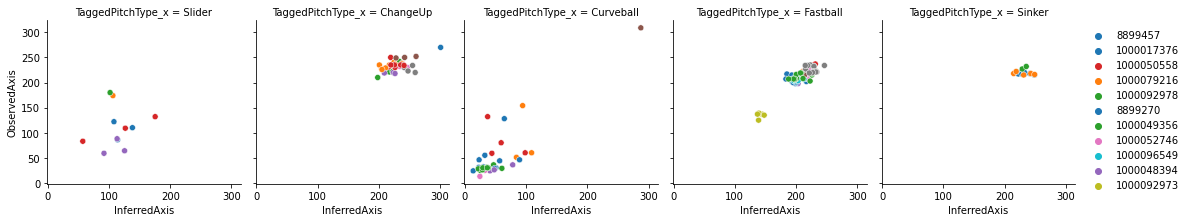

In [320]:
# Whole pitching staff Axis Deviation plots for each pitch type
g = sns.FacetGrid(sswdf, col="TaggedPitchType_x")
g.map_dataframe(sns.scatterplot, x="InferredAxis", y="ObservedAxis", hue="PitcherId")
g.set_axis_labels("InferredAxis", "ObservedAxis")
g.add_legend()

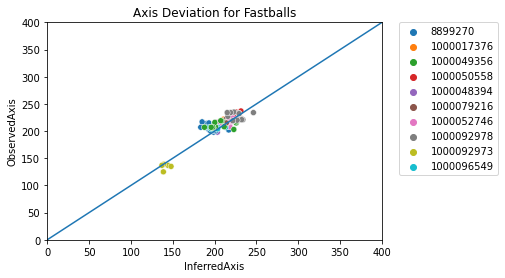

In [321]:
# Plot Axis deviation for the whole pitching staff's fastballs only
fbsswplot = sns.scatterplot( x="InferredAxis", y="ObservedAxis", data=sswfb, hue='PitcherId')
x = fbsswplot.set(xlim=(0, 400))
y = fbsswplot.set(ylim=(0, 400))
plt.plot([0, 400], [0, 400])
fbsswplot.set(title="Axis Deviation for Fastballs")
plt.rcParams['figure.figsize'] = [6, 6]
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

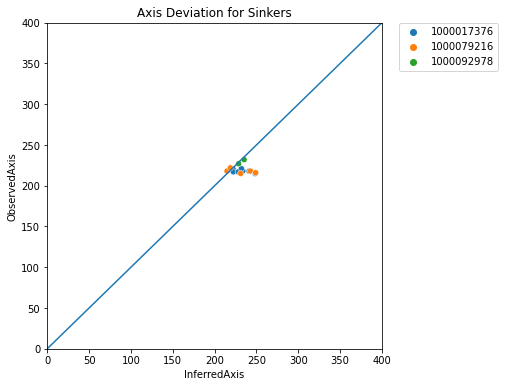

In [322]:
# Plot Axis deviation for the whole pitching staff's sinkers only
sinksswplot = sns.scatterplot( x="InferredAxis", y="ObservedAxis", data=sswsink, hue='PitcherId')
sinksswplot.set(xlim=(0, 400))
sinksswplot.set(ylim=(0, 400))
plt.plot([0, 400], [0, 400])
sinksswplot.set(title="Axis Deviation for Sinkers")
plt.rcParams['figure.figsize'] = [6, 6]
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

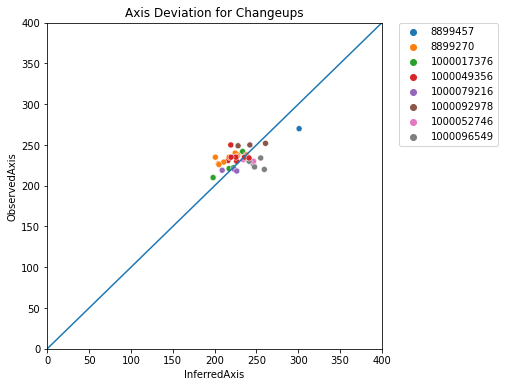

In [323]:
# Plot Axis deviation for the whole pitching staff's changeups only
changesswplot = sns.scatterplot( x="InferredAxis", y="ObservedAxis", data=sswchange, hue='PitcherId')
changesswplot.set(xlim=(0, 400))
changesswplot.set(ylim=(0, 400))
plt.plot([0, 400], [0, 400])
changesswplot.set(title="Axis Deviation for Changeups")
plt.rcParams['figure.figsize'] = [6, 6]
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [324]:
# Plots of InducedVertDeviation (x-axis) vs HorzBreakDeviation (y-axis)

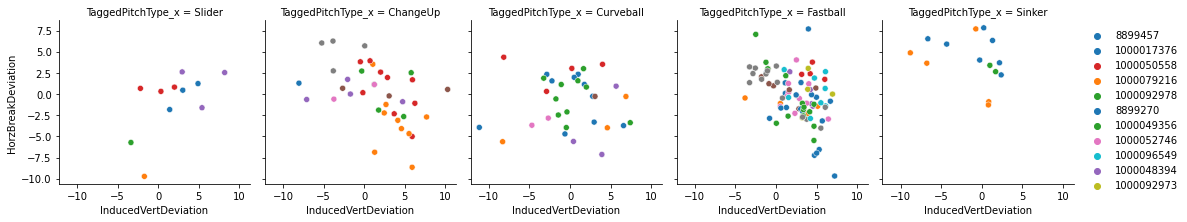

In [325]:
# Whole pitching staff Axis Deviation plots for each pitch type
b = sns.FacetGrid(sswdf, col="TaggedPitchType_x")
b.map_dataframe(sns.scatterplot, x="InducedVertDeviation", y="HorzBreakDeviation", hue="PitcherId")
b.set_axis_labels("InducedVertDeviation", "HorzBreakDeviation")
b.add_legend()

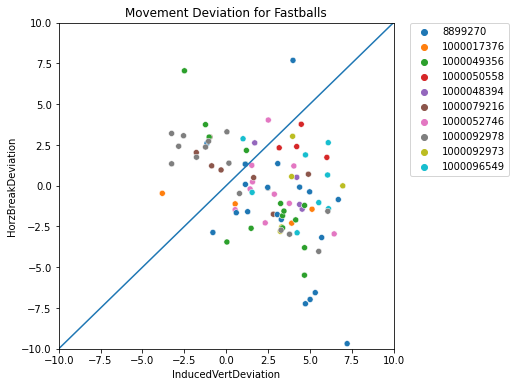

In [326]:
# Plot Movement deviation for the whole pitching staff's fastballs only
fbmoveplot = sns.scatterplot( x="InducedVertDeviation", y="HorzBreakDeviation", data=sswfb, hue='PitcherId')
fbmoveplot.set(xlim=(-10, 10))
fbmoveplot.set(ylim=(-10, 10))
plt.plot([-10, 10], [-10, 10])
fbmoveplot.set(title="Movement Deviation for Fastballs")
plt.rcParams['figure.figsize'] = [6, 6]
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

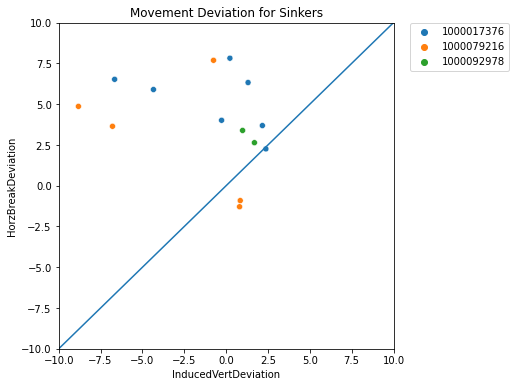

In [327]:
# Plot Movement deviation for the whole pitching staff's sinkers only
sinkmoveplot = sns.scatterplot( x="InducedVertDeviation", y="HorzBreakDeviation", data=sswsink, hue='PitcherId')
sinkmoveplot.set(xlim=(-10, 10))
sinkmoveplot.set(ylim=(-10, 10))
plt.plot([-10, 10], [-10, 10])
sinkmoveplot.set(title="Movement Deviation for Sinkers")
plt.rcParams['figure.figsize'] = [6, 6]
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

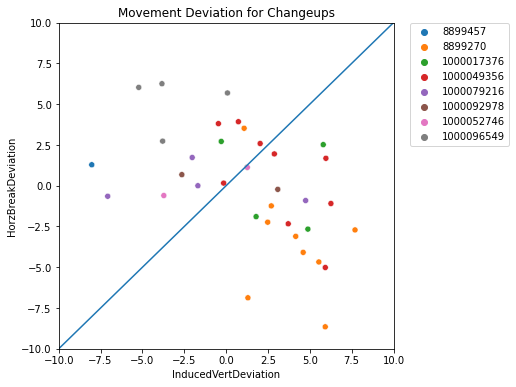

In [328]:
# Plot Movement deviation for the whole pitching staff's changeups only
changemoveplot = sns.scatterplot( x="InducedVertDeviation", y="HorzBreakDeviation", data=sswchange, hue='PitcherId')
changemoveplot.set(xlim=(-10, 10))
changemoveplot.set(ylim=(-10, 10))
plt.plot([-10, 10], [-10, 10])
changemoveplot.set(title="Movement Deviation for Changeups")
plt.rcParams['figure.figsize'] = [6, 6]
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)